# Kevin Falk Python Assignment - 2017

## Question 1

In [20]:
## 1 ##
#define a new function by def follwed by the function name "get_sequences_from_file" in this case.
#fasta_fn is the file that has been previously read in.
def get_sequences_from_file(fasta_fn):
#a new dictionary named "sequence_data_dict" is defined which is empty now but will be used within the function.
    sequence_data_dict = {}
#for loop starts by using biopython's sequence input/output interface "SeqIO".
#each record starts with a “>” line, SeqIO uses to locate new records in the file read in. 
#Parse() reads the records in one by one (fasta_fn) which is a "fasta" file. 
    for record in SeqIO.parse(fasta_fn, "fasta"):
#biopython uses the record.description function.
#.split() splits characters separated by white space - here it will split up all the words in the description.
        description = record.description.split()
#the function creates a species name by taking the first and second index (genus and species) and adding them together.
        species_name = description[1] + " " + description[2]
#fills the aforementioned dictionary (sequence_data_dict) with each individual record including it's species name.    
        sequence_data_dict[species_name] = record.seq
#returns the now completed dictionary (sequence_data_dict) that contains a record for each species name and its sequence.
    return(sequence_data_dict)

## Utilize the get_sequences_from_file function to get the sequences from our penguins_cytb.fasta file

In [21]:
fasta_fn = "penguins_cytb.fasta"
(get_sequences_from_file(fasta_fn))
penguin_library = (get_sequences_from_file(fasta_fn))

# Question 2
## Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [22]:
## 2 ##
from Bio.Data import CodonTable

mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]

def translate_function(string_nucleotides): 
    #Bring in the codon table from Biopython
    #unambiguous_dna_by_name extends a codon list to include all possible ambigous codons
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    #initialize amino_acid variable
    amino_acid = ""
    #start a for loop to step through the sequence at 3 characters at a time
    #this is assuming the last codon is a stop codon (as it leaves the last 3 nucleotides out)
    for i in range(0, len(string_nucleotides)-3, 3):
        
        codon = string_nucleotides[i:i+3]
        aa = mito_table.forward_table[codon]
        amino_acid += aa
    return  amino_acid

translate_function("ATGGCCCTGGACCTTTCCACT")

'MALDLS'

# Question 3
## Write an alternative translation function.

In [23]:
## 3 ##
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC
#write a for loop that will read through the dictionary and pull the species names (description) and values (sequences)
for key, value in penguin_library.items():
    #use the biopython translate function to translate the DNA to protein
    protein = value.translate(to_stop=False)
    #print statement for each species
    print("Translation to protein of " + key +" : " + protein + "\n")

Translation to protein of Aptenodytes forsteri : MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAIHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGFYYGSYLYKET*NTGIILLLTLMATAFVGYVLP*GQISF*GATVITNLFSAIPYIGQTLVEWT*GGFSVDNPTLTRFFALHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALILLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPE*YFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTIAFRPLSQLLF*ALVANLIILT*VGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKILNH*

Translation to protein of Aptenodytes patagonicus : MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAIHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGFYYGSYLYKET*NTGIILLLTLIATAFVGYVLPWGQISF*GATVITNLFSAIPYIGQTLVE*A*GGFSVDNPTLTRFFALHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALILLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPE*YFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTITFRPLSQLLF*TLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKILNH*

Translation to protein of Eudyptes chrysocome : MAPNLRKSHPLLKTINNSLIDLPTPSNISA**NFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYG*LIRNLHA

# Question 4
## Write a function that calculates the molecular of each 3 amino acid sequence.

In [50]:
## 4 ##
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC

#create a variable that will be needed in the loop
molecular_weight_list = []
#write a for loop that will read through the dictionary and pull the species names (description) and values (sequences)
for key, value in penguin_library.items():
    #use the biopython translate function to translate the DNA to protein
    protein = value.translate(to_stop=True)
    #use the str() function to change the variable into a string
    protein_string = str(protein) 
    #use the PROTEINANALYSIS function to analyse the sequence
    analysed_seq = ProteinAnalysis(protein_string)
    #use the MOLECULAR_WEIGHT function to acquire the molecular weight
    string_weight = str(analysed_seq.molecular_weight())
    #create a list of all the molecular weights to use later
    molecular_weight_list.append(string_weight)
    #print statement for each species
    print("Molecular weight of " + key +" protein: " + string_weight)

Molecular weight of Aptenodytes forsteri protein: 3268.8268000000007
Molecular weight of Aptenodytes patagonicus protein: 3268.8268000000007
Molecular weight of Eudyptes chrysocome protein: 3256.7731000000013
Molecular weight of Eudyptes chrysolophus protein: 3256.7731000000013
Molecular weight of Eudyptes sclateri protein: 3256.7731000000013
Molecular weight of Eudyptula minor protein: 3298.8528000000015
Molecular weight of Pygoscelis adeliae protein: 3268.8268000000007
Molecular weight of Pygoscelis antarctica protein: 3268.8268000000007
Molecular weight of Pygoscelis papua protein: 3292.934400000001
Molecular weight of Spheniscus demersus protein: 3256.7731000000013
Molecular weight of Spheniscus humboldti protein: 3256.7731000000013
Molecular weight of Spheniscus magellanicus protein: 3256.7731000000013


# Question 5
## Write a function that computes the GC-content of each DNA sequence.

In [25]:
## 5 ##
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC
from Bio.SeqUtils import GC
#write a for loop that will read through the dictionary and pull the species names (description) and values (sequences)
for key, value in penguin_library.items():
    #use the biopython function GC() to calculate GC content
    GC_content = GC(value)
    #convert GC content to a string for use later
    GC_string = str(GC_content)
    #print statement for each species
    print("GC content of " + key + " sequence: " + GC_string)

GC content of Aptenodytes forsteri sequence: 48.38145231846019
GC content of Aptenodytes patagonicus sequence: 49.69378827646544
GC content of Eudyptes chrysocome sequence: 51.181102362204726
GC content of Eudyptes chrysolophus sequence: 50.91863517060367
GC content of Eudyptes sclateri sequence: 50.83114610673666
GC content of Eudyptula minor sequence: 49.25634295713036
GC content of Pygoscelis adeliae sequence: 49.08136482939633
GC content of Pygoscelis antarctica sequence: 47.76902887139108
GC content of Pygoscelis papua sequence: 47.15660542432196
GC content of Spheniscus demersus sequence: 48.29396325459317
GC content of Spheniscus humboldti sequence: 49.25634295713036
GC content of Spheniscus magellanicus sequence: 48.20647419072616


# Question 6
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.

In [26]:
## 6 ##
import numpy as np
import pandas as pd
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
#add new columns to df and set them as not a number (NaN)
penguins_df["Molecular Weight"] = np.nan
penguins_df["GC Content"] = np.nan

# Question 7:
## Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.

In [75]:
## 7 ##
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC
from Bio.SeqUtils import GC
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np
import pandas as pd

#write a for loop that will read through the dictionary and pull the species names (description) and values (sequences)
for key, value in penguin_library.items():
    #use the biopython translate function to translate the DNA to protein
    protein = value.translate(to_stop=True)
    #use the str() function to change the variable into a string
    protein_string = str(protein) 
    #use the PROTEINANALYSIS function to analyse the sequence
    analysed_seq = ProteinAnalysis(protein_string)
    #use the MOLECULAR_WEIGHT function to acquire the molecular weight
    string_weight = str(analysed_seq.molecular_weight())
    #create a list of all the molecular weights to use later
    molecular_weight_list.append(string_weight)
    #use the biopython function GC() to calculate GC content
    GC_content = GC(value)
    #convert GC content to a string for use later
    GC_string = str(GC_content)
    #create a list of all the GC Content to use later
    GC_content_list.append(GC_content)

#change list to an array so that we can append it to our dataframe
molecular_weight_array = np.asarray(molecular_weight_list)
#add array to our data frame under Molecular Weight column heading
penguins_df["Molecular Weight"] = pd.Series(molecular_weight_array)

#change list to an array so that we can append it to our dataframe
GC_content_array = np.asarray(GC_content_list)
#add array to our data frame under GC Content column heading
penguins_df["GC Content"] = pd.Series(GC_content_array)

#display dataframe
penguins_df


,species,mass,Molecular Weight,GC Content
0,Aptenodytes forsteri,28.00,3268.8268000000007,48.381452
1,Aptenodytes patagonicus,13.40,3268.8268000000007,49.693788
2,Eudyptes chrysocome,2.80,3256.7731000000013,51.181102
3,Eudyptes chrysolophus,4.50,3256.7731000000013,50.918635
4,Eudyptes sclateri,4.25,3256.7731000000013,50.831146
5,Eudyptula minor,1.60,3298.8528000000015,49.256343
6,Pygoscelis adeliae,4.60,3268.8268000000007,49.081365
7,Pygoscelis antarctica,4.10,3268.8268000000007,47.769029
8,Pygoscelis papua,6.10,3292.934400000001,47.156605
9,Spheniscus demersus,3.20,3256.7731000000013,48.293963


In [32]:
## 7 ##
#####################################################################
#from Bio.Seq import Seq
#from Bio import SeqIO
#from Bio.Alphabet import IUPAC
#from Bio.SeqUtils import GC
#from Bio.SeqUtils.ProtParam import ProteinAnalysis
#import numpy as np
#import pandas as pd
#
#penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
#penguins_df["Molecular Weight"] = np.nan
#penguins_df["GC Content"] = np.nan
#
#penguins_df.set_index("species", inplace=True)
#for key, value in penguin_library.items():
#    protein = value.translate(to_stop=True)
#    protein_string = str(protein) 
#    analysed_seq = ProteinAnalysis(protein_string)
#    penguins_df.loc[key,"Molecular Weight"] = analysed_seq.molecular_weight()
#    penguins_df.loc[key,"GC Content"] = GC(value)
#
#penguins_df
## 

# Question 8
## Plot a bar-chart of the mass with the x-axes labeled with species names.

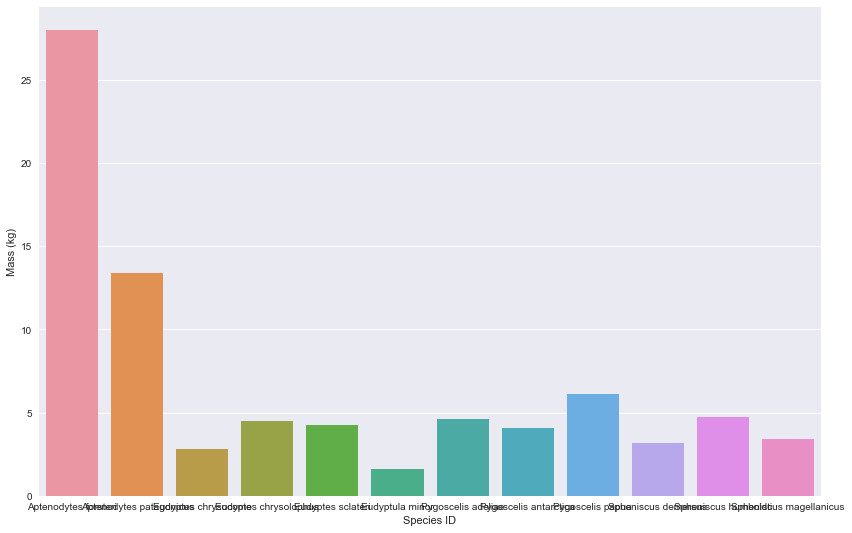

In [33]:
## 8 ##
#import matplot lib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#set the plot dimensions
plot_dims = (14, 9)

#Create barchart using matplotlib and seaborn
fig, ax = plt.subplots(figsize=plot_dims)
#set x variable as species and y variable as mass
sns.barplot(x = 'species', y = 'mass', data=penguins_df)
#set labels of chart
ax.set(xlabel='Species ID', ylabel='Mass (kg)')

## *Q1* What is the smallest penguin species? 
#Eudyptula minor
## *Q2* What else is interesting about this species?
#Their protein has the highest molecular weight of all the penguins in the dataset



# Question 9
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

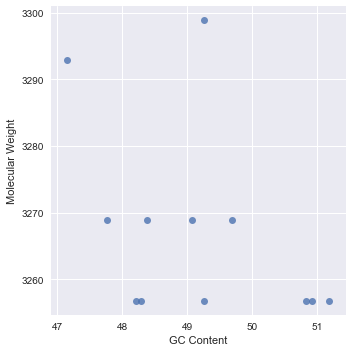

In [74]:
## 9 ##
import seaborn as sns
%matplotlib inline
#I had to change "Molecular Weight" to a number for this to work (I was getting an error).
penguins_df1 = penguins_df.apply(pd.to_numeric, errors='coerce')
#use the lmplot function to plot our data across a FacetGrid
sns.lmplot("GC Content", "Molecular Weight", data=penguins_df1, fit_reg=False)

# Question 10
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [45]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"
penguins_df.to_csv("penguins_mass_cytb.csv", sep=',', encoding='utf-8', index=False)

In [68]:
penguins_df

,species,mass,Molecular Weight,GC Content
0,Aptenodytes forsteri,28.00,3268.8268000000007,48.381452
1,Aptenodytes patagonicus,13.40,3268.8268000000007,49.693788
2,Eudyptes chrysocome,2.80,3256.7731000000013,51.181102
3,Eudyptes chrysolophus,4.50,3256.7731000000013,50.918635
4,Eudyptes sclateri,4.25,3256.7731000000013,50.831146
5,Eudyptula minor,1.60,3298.8528000000015,49.256343
6,Pygoscelis adeliae,4.60,3268.8268000000007,49.081365
7,Pygoscelis antarctica,4.10,3268.8268000000007,47.769029
8,Pygoscelis papua,6.10,3292.934400000001,47.156605
9,Spheniscus demersus,3.20,3256.7731000000013,48.293963
